In [2]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

In [3]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

In [8]:
def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(
            input_size=784,
            hidden_size_list=[100, 100, 100, 100, 100],
            output_size=10,
            weight_init_std=weight_init_std,
            use_batchnorm=True,
    )
    network = MultiLayerNetExtend(
            input_size=784,
            hidden_size_list=[100, 100, 100, 100, 100],
            output_size=10,
            weight_init_std=weight_init_std,
    )
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
        
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
            
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            
            print('epoch:' + str(epoch_cnt) + ' | ' + str(train_acc) + ' - ' + str(bn_train_acc))
            
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

==========1/16==========
epoch:0 | 0.097 - 0.101
epoch:1 | 0.097 - 0.122
epoch:2 | 0.097 - 0.131


../common/functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
../common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:3 | 0.097 - 0.144
epoch:4 | 0.097 - 0.173
epoch:5 | 0.097 - 0.189
epoch:6 | 0.097 - 0.216
epoch:7 | 0.097 - 0.226
epoch:8 | 0.097 - 0.248
epoch:9 | 0.097 - 0.261
epoch:10 | 0.097 - 0.293
epoch:11 | 0.097 - 0.309
epoch:12 | 0.097 - 0.319
epoch:13 | 0.097 - 0.329
epoch:14 | 0.097 - 0.336
epoch:15 | 0.097 - 0.352
epoch:16 | 0.097 - 0.37
epoch:17 | 0.097 - 0.376
epoch:18 | 0.097 - 0.377
epoch:19 | 0.097 - 0.403
==========2/16==========
epoch:0 | 0.099 - 0.073
epoch:1 | 0.097 - 0.084
epoch:2 | 0.097 - 0.108


/workspace/env/package/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


epoch:3 | 0.097 - 0.158
epoch:4 | 0.097 - 0.184
epoch:5 | 0.097 - 0.201
epoch:6 | 0.097 - 0.234
epoch:7 | 0.097 - 0.268
epoch:8 | 0.097 - 0.295
epoch:9 | 0.097 - 0.314
epoch:10 | 0.097 - 0.337
epoch:11 | 0.097 - 0.37
epoch:12 | 0.097 - 0.393
epoch:13 | 0.097 - 0.414
epoch:14 | 0.097 - 0.434
epoch:15 | 0.097 - 0.458
epoch:16 | 0.097 - 0.478
epoch:17 | 0.097 - 0.492
epoch:18 | 0.097 - 0.505
epoch:19 | 0.097 - 0.523
==========3/16==========
epoch:0 | 0.122 - 0.097
epoch:1 | 0.284 - 0.105
epoch:2 | 0.373 - 0.143
epoch:3 | 0.476 - 0.179
epoch:4 | 0.581 - 0.203
epoch:5 | 0.611 - 0.237
epoch:6 | 0.68 - 0.258
epoch:7 | 0.723 - 0.288
epoch:8 | 0.752 - 0.316
epoch:9 | 0.786 - 0.343
epoch:10 | 0.808 - 0.384
epoch:11 | 0.834 - 0.419
epoch:12 | 0.861 - 0.448
epoch:13 | 0.867 - 0.465
epoch:14 | 0.89 - 0.491
epoch:15 | 0.908 - 0.519
epoch:16 | 0.92 - 0.537
epoch:17 | 0.93 - 0.558
epoch:18 | 0.939 - 0.577
epoch:19 | 0.942 - 0.601
==========4/16==========
epoch:0 | 0.115 - 0.078
epoch:1 | 0.268 - 0.105

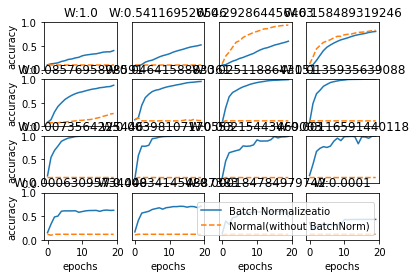

In [9]:
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print('==========' + str(i+1) + '/16' + '==========')
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4, 4, i+1)
    plt.title('W:' + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalizeatio', markevery=2)
        plt.plot(x, train_acc_list, linestyle='--', label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle='--', markevery=2)
        
    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel('accuracy')
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel('epochs')
    plt.legend(loc='lower right')
    
plt.show()